In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train labels shape: (60000, 10)
Test labels shape: (10000, 10)
Accuracy with 4 neurons: 0.8756
Accuracy with 8 neurons: 0.9222
Accuracy with 16 neurons: 0.9575
Accuracy with 32 neurons: 0.9686
Accuracy with 64 neurons: 0.9730
Accuracy with 128 neurons: 0.9816
Accuracy with 256 neurons: 0.9827


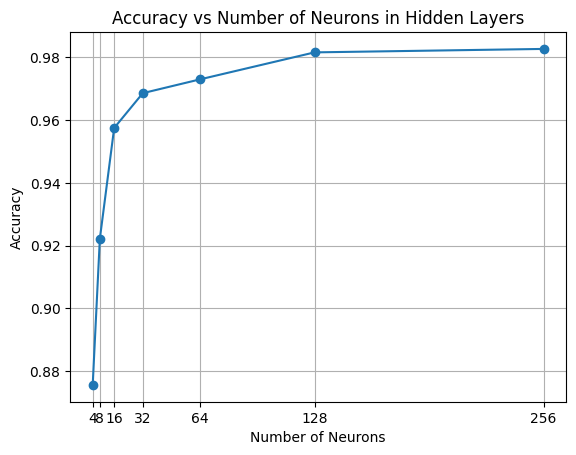

In [19]:
import os
os.chdir('/content/drive/MyDrive/comp5214/PA1')
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

neurons = [4, 8, 16, 32, 64, 128, 256]
accuracies = []
batch_size = 64
num_epoch = 20
IMG_SIZE = 28 * 28

(train_images, train_labels), (test_images, test_labels) = load_mnist()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images.reshape(-1, IMG_SIZE)
test_images = test_images.reshape(-1, IMG_SIZE)


for n in neurons:
    model = models.Sequential()
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='valid')
    model.add(layers.Dense(n, activation='relu', input_shape=(IMG_SIZE,)))
    model.add(layers.Dense(n, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    model.fit(train_images, train_labels, epochs=num_epoch, batch_size=batch_size, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    accuracies.append(test_acc)
    print(f"Accuracy with {n} neurons: {test_acc:.4f}")

# 绘制结果
plt.figure()
plt.plot(neurons, accuracies, marker='o')
plt.title('Accuracy vs Number of Neurons in Hidden Layers')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(neurons)
plt.grid()
plt.show()